# NOTEBOOK IA DE INVERSIÓN

## Recolección de datos

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Para leer stocks de Yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [3]:
# "Datetime" nos ayuda a concretar un tiempo
from datetime import datetime

In [4]:
# El tipo de empresas que cogemos, en este caso, empresas que venden moviles
tech_list = ['AAPL', 'MSI', 'XIACF']

In [5]:
# Damos un  inicio y un final al tiempo para la recolección de datos
tech_list = ['AAPL', 'MSI', 'XIACF']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, MSI, XIACF]
company_name = ["APPLE", "MOTOROLA", "XIAOMI"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-14,2.230,2.230,2.15,2.200,2.200,18900,XIAOMI
2024-06-17,2.200,2.240,2.18,2.240,2.240,14200,XIAOMI
2024-06-18,2.205,2.240,2.16,2.220,2.220,25000,XIAOMI
2024-06-20,2.250,2.340,2.25,2.300,2.300,26100,XIAOMI
2024-06-21,2.100,2.370,2.10,2.310,2.310,20600,XIAOMI
2024-06-24,2.090,2.359,2.09,2.330,2.330,91000,XIAOMI
2024-06-25,2.330,2.330,2.28,2.288,2.288,3100,XIAOMI
2024-06-26,2.280,2.290,2.23,2.235,2.235,35500,XIAOMI
2024-06-27,2.230,2.360,2.10,2.130,2.130,19700,XIAOMI


# Visualización de datos

.describe genera estadisticas descriptivas para resumir la tendencia general, la dispersión y así ver mejor la distribución del dataset; excluyendo los valores NaN

Open-High-Low-Close(OHLC) es una de las practicas que se utilizan para recolectar puntos claves de datos pertinentes de una empresa 

In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,184.108810,185.684802,182.644762,184.164127,183.687248,6.035869e+07
std,10.820359,10.938633,10.673073,10.767602,10.799807,2.483080e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801846,4.674302e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502815,5.364845e+07
75%,191.417503,192.595005,190.194996,191.360001,190.931274,6.631700e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.464214e+08


Tenemos un total de 255 dias, ya que no estan los fines de semana. La bolsa opera de lunes a viernes. 

In [7]:
# Para visualizar información general
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-29 to 2024-06-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Precio de cierre

El precio de cierre es el último precio al que se cotiza la acción durante el día de negociación habitual. El precio de cierre de una acción es el punto de referencia estándar que utilizan los inversores para seguir su rendimiento a lo largo del tiempo.


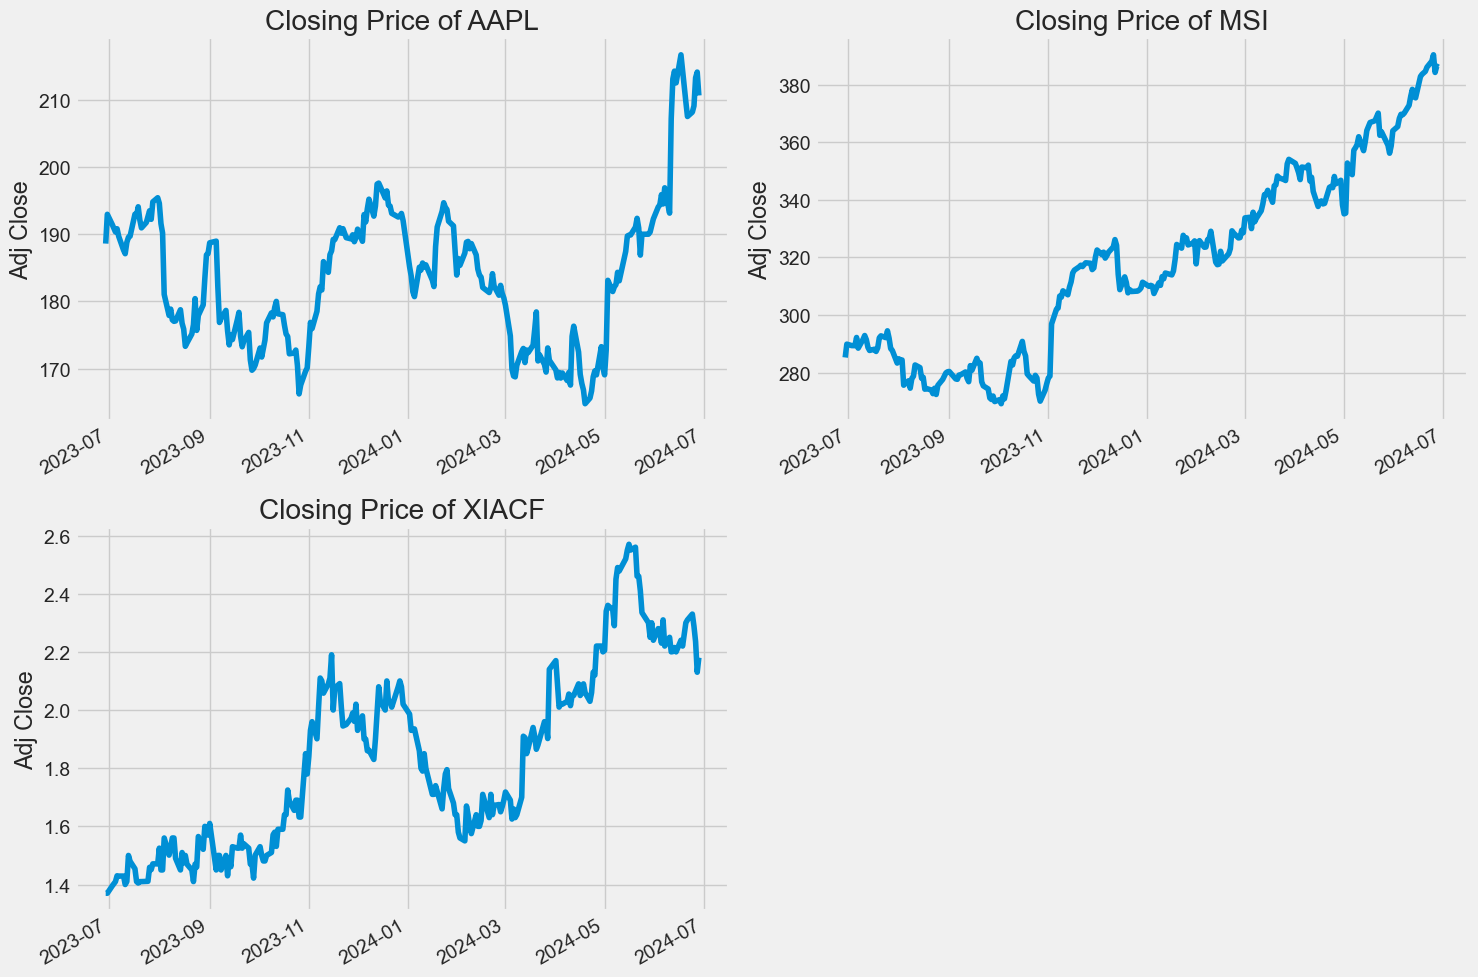

In [8]:
# En estos graficos vemos el historico del precio de cierre 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volumen de ventas

El volumen es la cantidad de un activo o valor que cambia de manos durante un período de tiempo, a menudo en el transcurso de un día. 

Por ejemplo, el volumen de negociación de acciones se referiría a la cantidad de acciones de un valor negociadas entre su apertura y cierre diarios. 

El volumen de negociación y los cambios en el volumen a lo largo del tiempo son datos importantes para los indicadores técnicos.

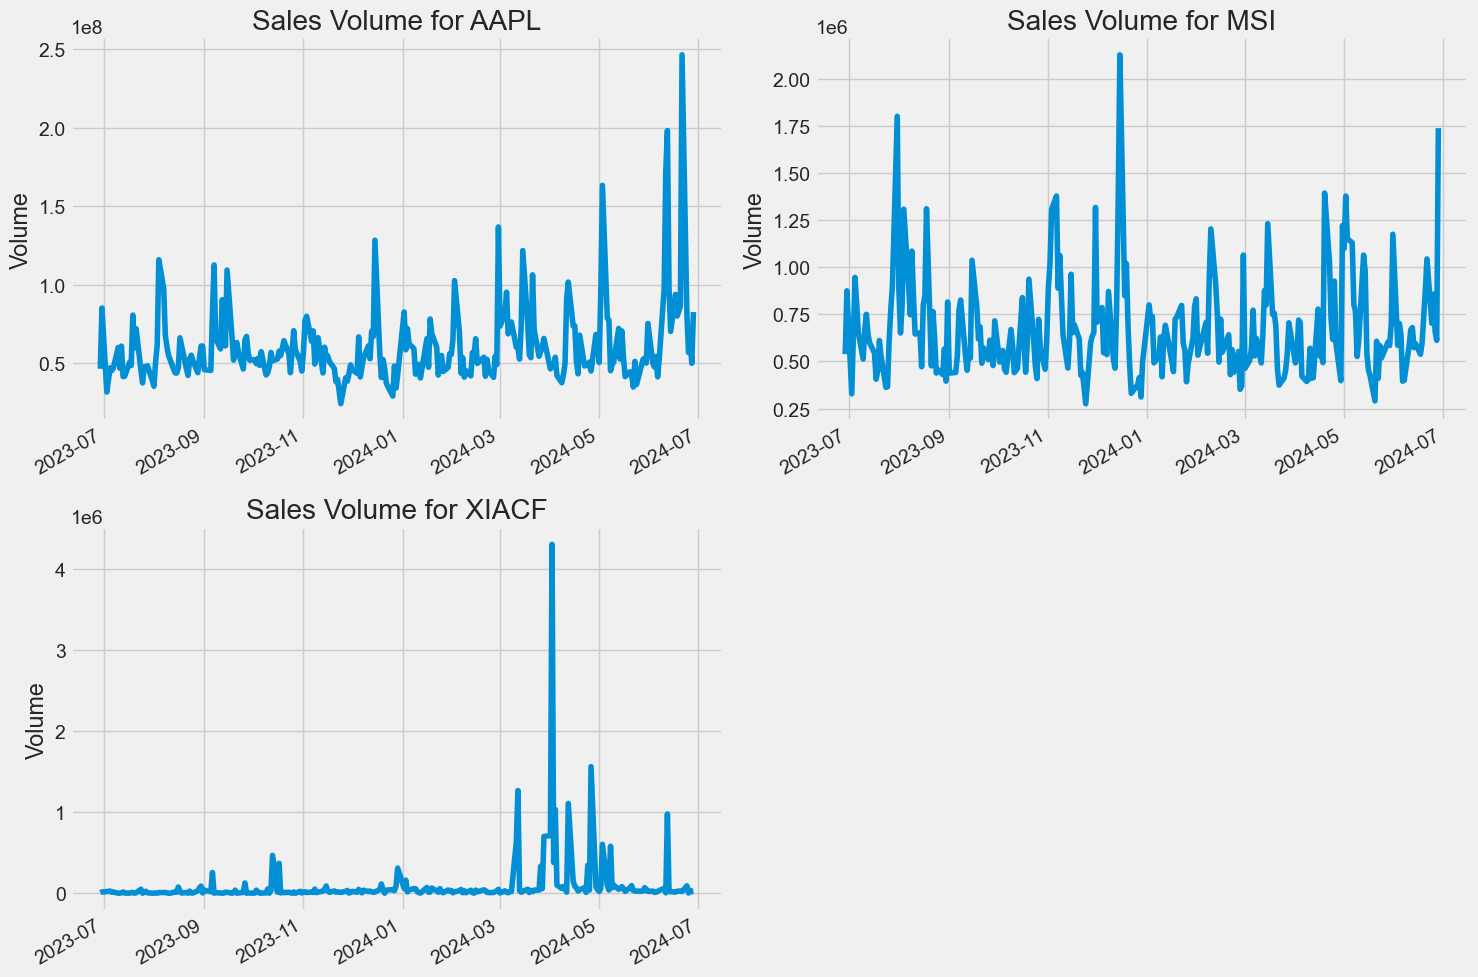

In [9]:
# Ahora haremos algunos graficos con el volumen total de acciones que se negocian cada día.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Indicador tecnico: Moving average

Es una herramienta de analisis tecnico simple (indicador), nos da una tendencia del precio, lo cual suaviza los cambios de precio ya que nos da un precio promedio.

Este promedio se da en un periodo de tiempo especifico (20 minutos, 10 dias, 30 dias, 1 año...)

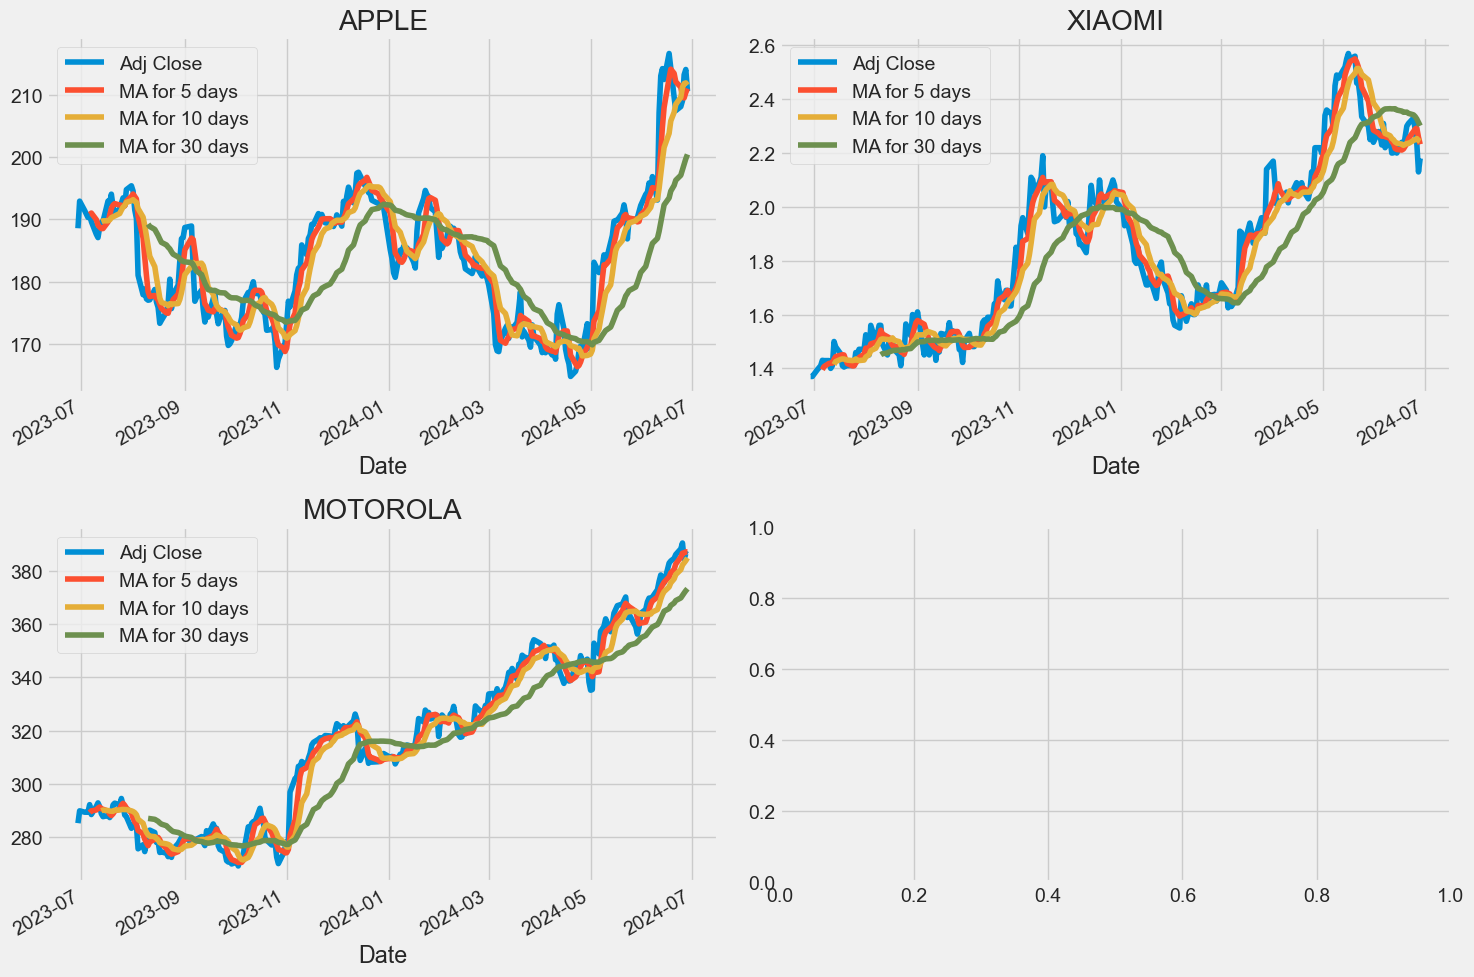

In [34]:
ma_day = [5, 10, 30]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

XIACF[['Adj Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('XIAOMI')

MSI[['Adj Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MOTOROLA')

fig.tight_layout()

Vemos que 30 dias se desplaza algo mas, mientras que los 5 y 10 dias capturan mejor la tendencia.

## Rendimiento promedio diario de las acciones

Ahora que hemos realizado un análisis de referencia, creo que podemos profundizar un poco más. 

Analizaremos el riesgo de las acciones. Para ello, tendremos que observar más de cerca los cambios diarios de las acciones, y no solo su valor absoluto. 

Utilizaremos Pandas para recuperar los rendimientos diarios de las acciones de Apple.

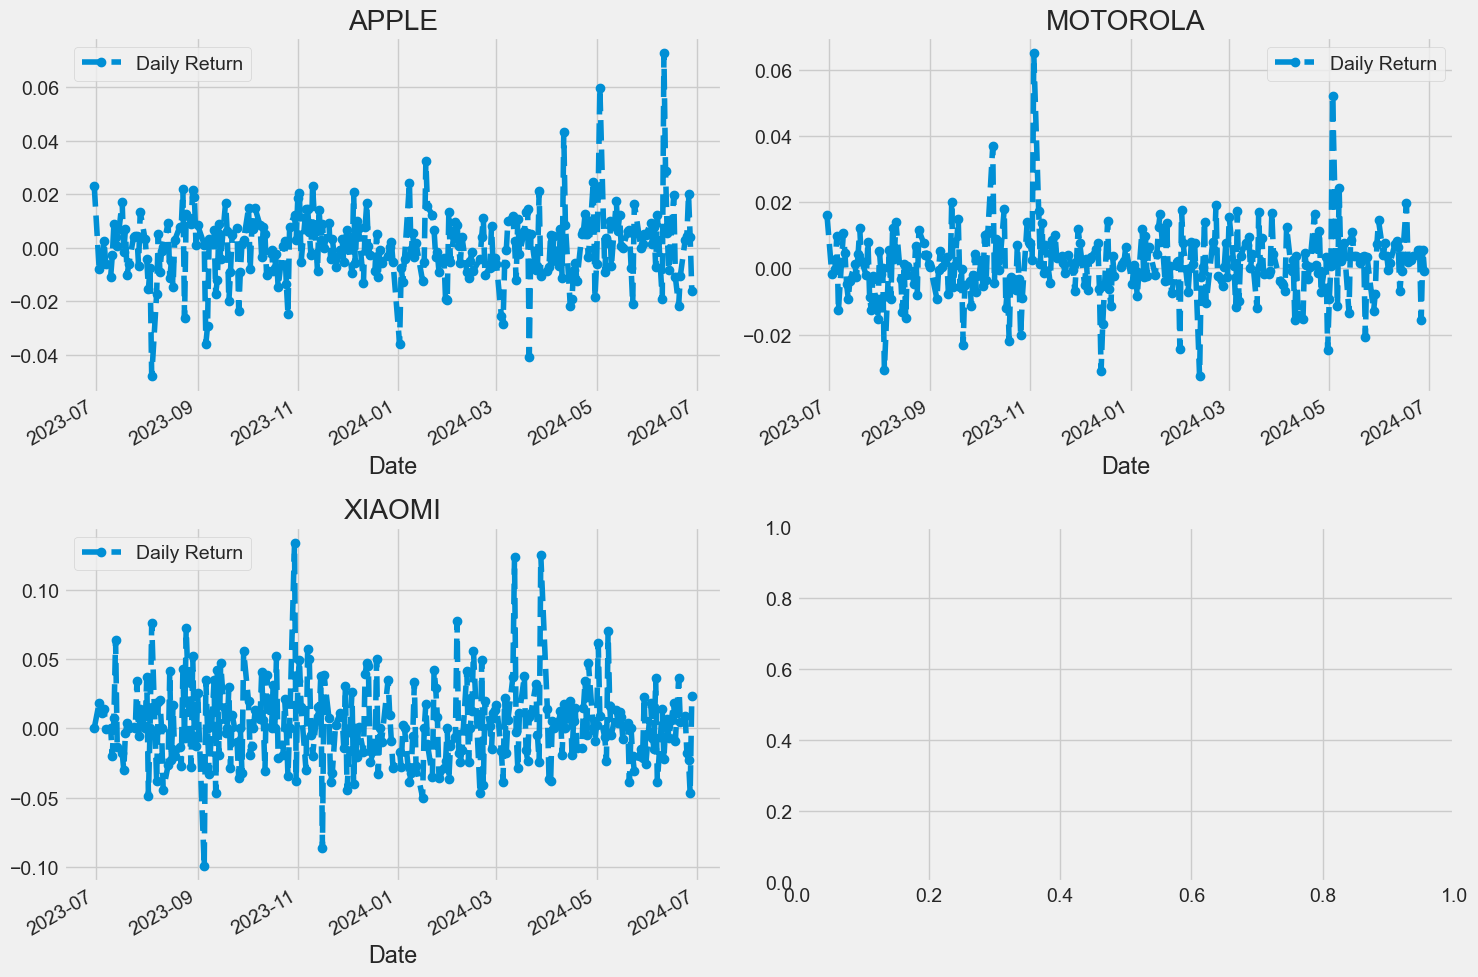

In [11]:
# Usaremos pct_change para encontrar el cambio en porcentajes para cada día.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Sacareos los porcentajes del rendimiento
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

MSI['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MOTOROLA')

XIACF['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('XIAOMI')

fig.tight_layout()

Ahora que hemos visto el rendimiento general utilizando un histograma, utilizaremos seaborn para crear un histograma y un kde plot en la misma figura

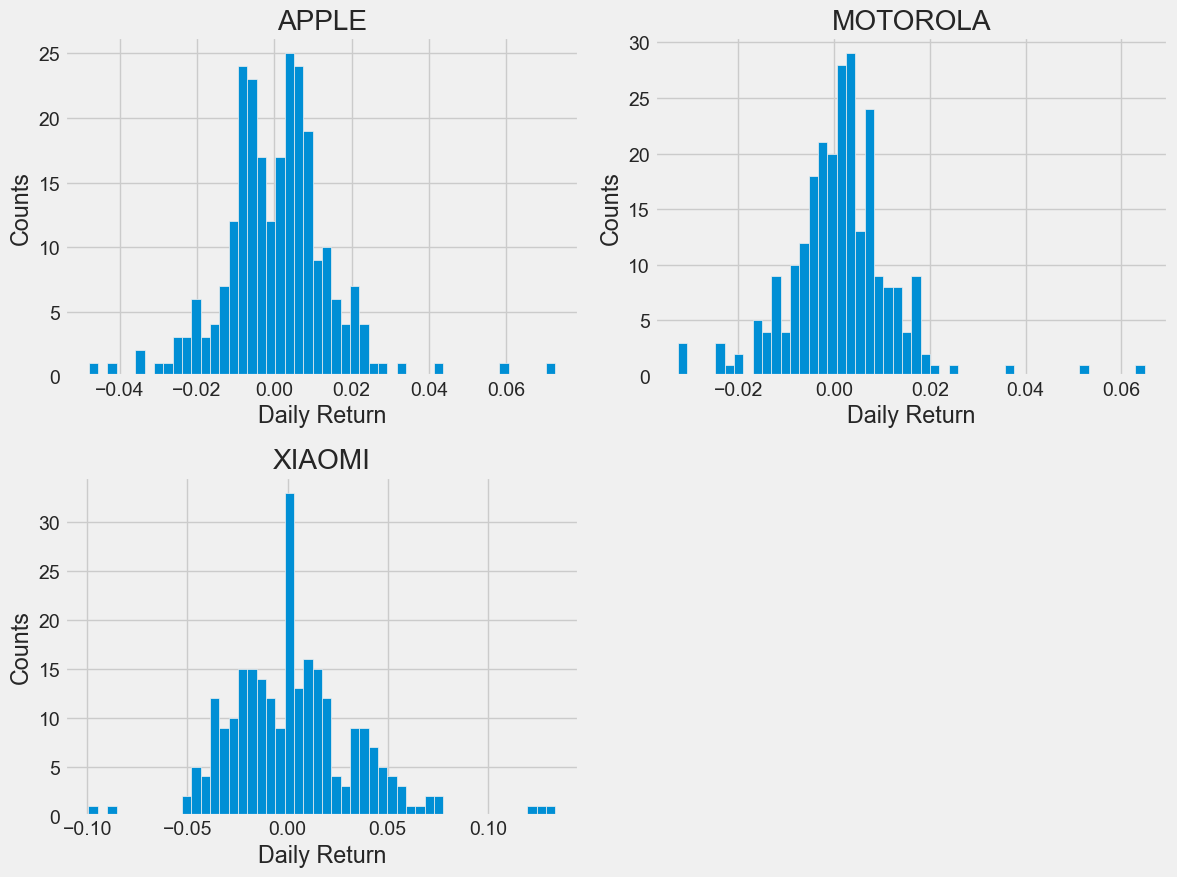

In [12]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlación entre precios de cierre

La correlación es una estadística que mide el grado en que dos variables se mueven entre sí y tiene un valor que debe estar entre -1,0 y +1,0. 

La correlación mide la asociación, pero no muestra si x causa y o viceversa, o si la asociación es causada por un tercer factor

In [13]:
# Obtenemos todos los precios de cierre de la lista de acciones en un solo DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Y hacemos el nuevo DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,MSI,XIACF
Date,,,
2023-06-29,NaN,NaN,NaN
2023-06-30,0.023103,0.016251,0.000000
2023-07-03,-0.007785,-0.001773,0.018248
2023-07-05,-0.005871,-0.000068,0.010753
2023-07-06,0.002509,0.009838,0.014184


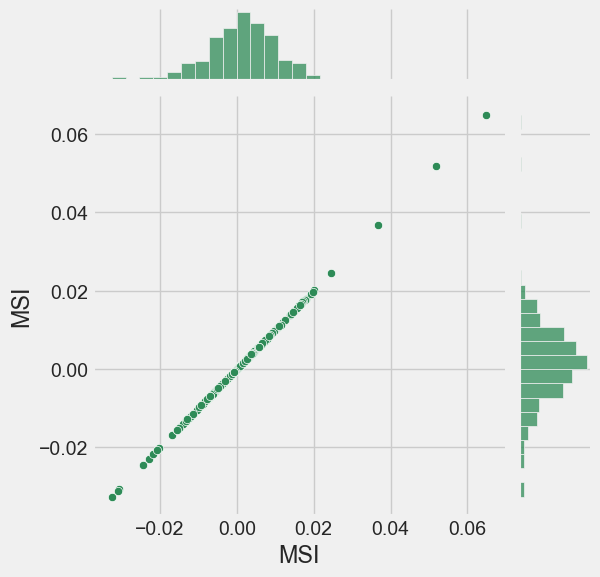

In [14]:
# Comparar a una empresa con si misma deberia darnos una relación lineal perfecta. Aqui podemos ver un ejemplo
sns.jointplot(x='MSI', y='MSI', data=tech_rets, kind='scatter', color='seagreen')

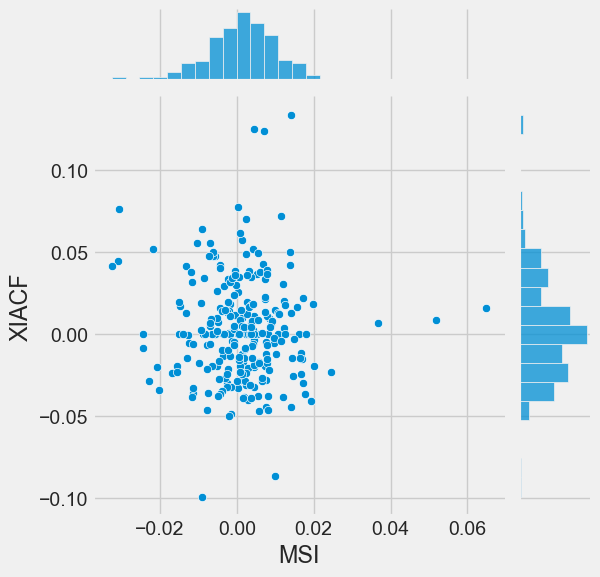

In [15]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='MSI', y='XIACF', data=tech_rets, kind='scatter')

Aquí podemos ver si dos empresas de inversión estan alineadas y si lo están de forma positiva. 

C:\Users\annek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


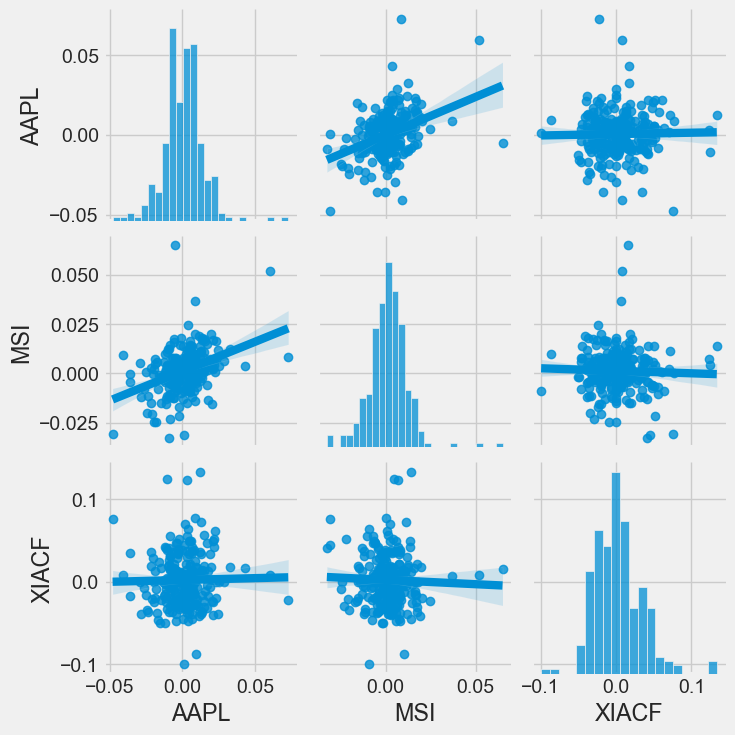

In [17]:
# Podemos simplemente llamar a pairplot en nuestro DataFrame para un análisis visual automático 
# de todas las comparaciones


sns.pairplot(tech_rets, kind='reg')

Arriba podemos ver las relaciones entre las diferentes empresas.

A diferencia del notebook original, nosotros vemos pocas relaciones entre ellas.
Como mucho parece tenerla Apple y Motorola, que lo hace de forma mas o menos positiva, aunque con mucha dispersión

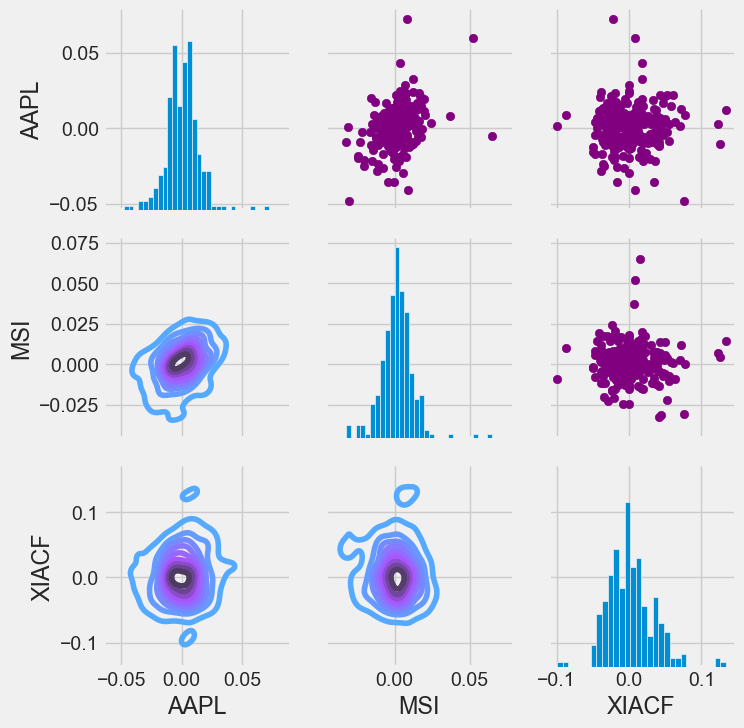

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

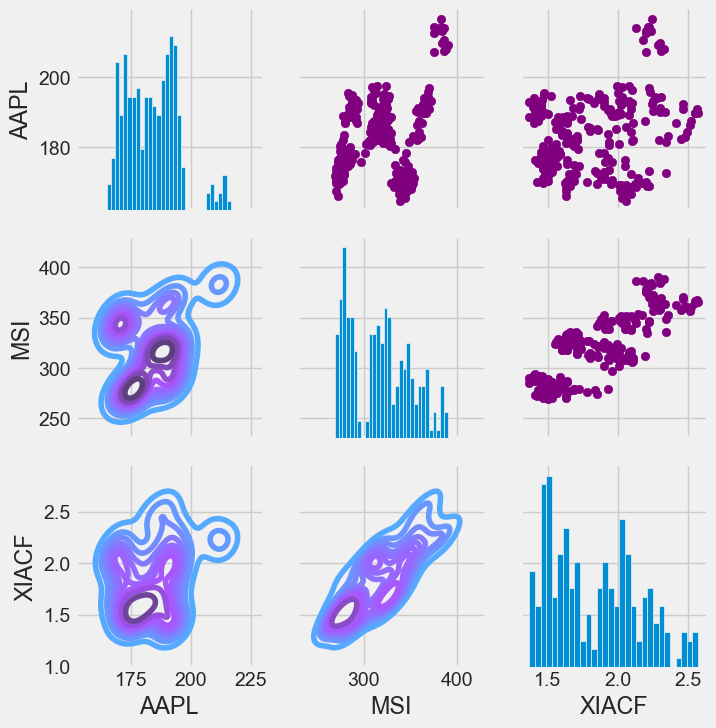

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Pero a parte de las graficas, podemos verlo también de forma numérica

Text(0.5, 1.0, 'Correlation of stock closing price')

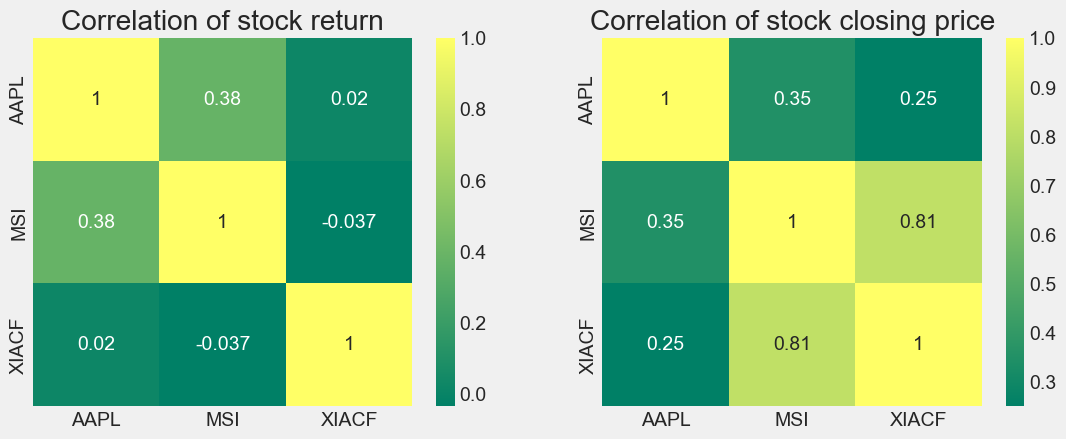

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Aqui podemos ver de forma más clara la diferencia. La relación mas fuerte o positiva la encontramos entre Motorola y Xiaomi en su reación en su cierre de precios

## CALCULAR EL RIESGO

Hay muchas maneras de calcular el riesgo de una inversión, en este caso se utiliza el retorno diario en porcentajes y comprandolo con el rendimiento esperado con la desviación estandar del retorno estandar.

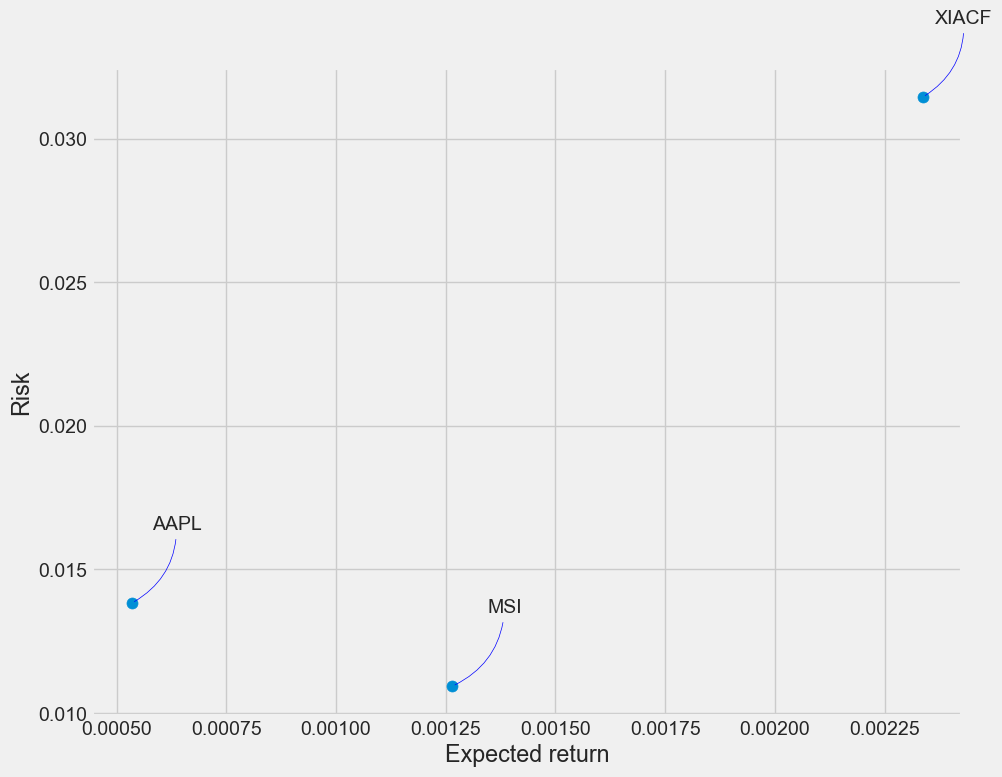

In [23]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


## Predicción de precio

In [24]:
# Obtener la cotización de las acciones
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416984,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483713,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622308,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754259,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200


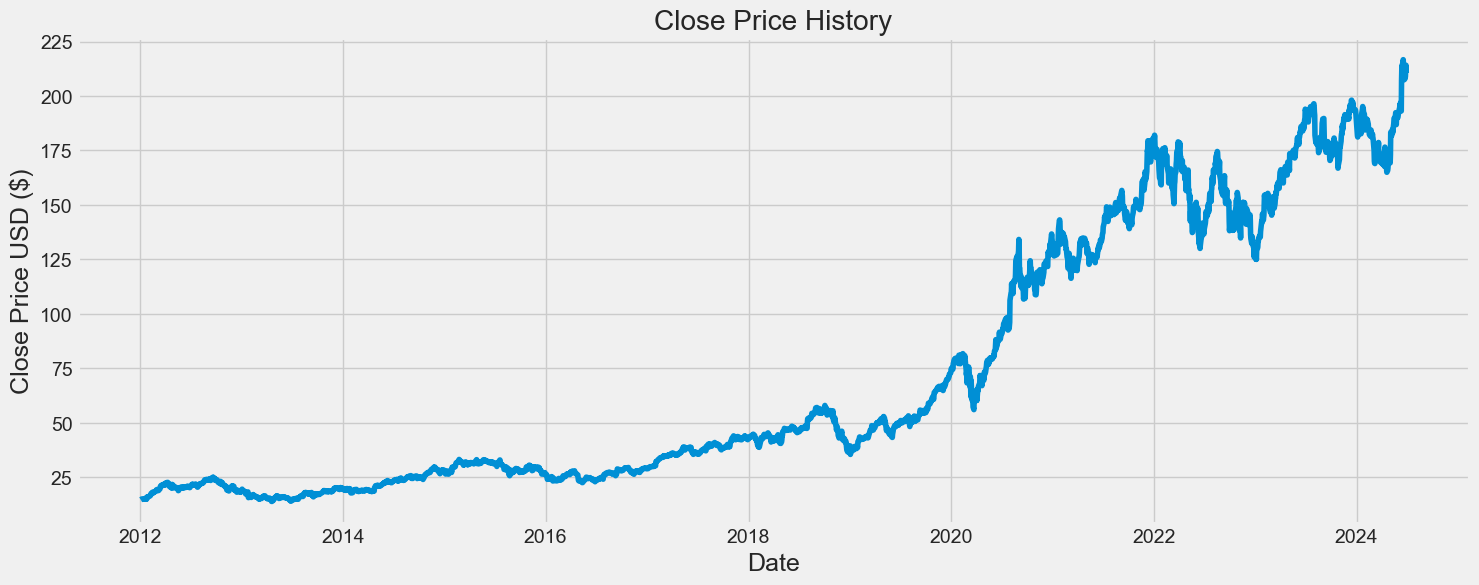

In [25]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [26]:
# Creamos un dataframesolo con la columna de 'cierre'/'Close'  
data = df.filter(['Close'])
# Convertir el dataframe a un numpy array
dataset = data.values
# Obtener el numero de lineas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2985

In [27]:
# Escalar los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00364679],
       [0.00403613],
       [0.00484476],
       ...,
       [0.98312966],
       [0.98732261],
       [0.97015623]])

In [28]:
# Crear un data set de entrenamiento
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertir el x_train y y_train a numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Y damos forma a la data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00524467, 0.00649727, 0.00526406,
       0.0098886 , 0.00953098, 0.00999783, 0.0110073 , 0.01161862,
       0.01156753, 0.01137903, 0.01218238, 0.01293816, 0.01379437,
       0.01517733, 0.01808242, 0.01812647, 0.01974374, 0.02095228,
       0.01887521, 0.01967503, 0.01965918, 0.02190186, 0.02158299,
       0.02217316, 0.02323373, 0.02382391, 0.02552398, 0.02676248,
       0.02712011, 0.0272452 , 0.0251276 , 0.02461669, 0.02469245,
       0.02668321, 0.02724344, 0.0284467 , 0.03128309, 0.03506729,
       0.03435907, 0.03436083, 0.03709681, 0.03795301, 0.03734344,
       0.03678674, 0.03620713, 0.0381327 , 0.03945401, 0.04000719])]
[0.03864008132174998]

[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar el modelo 
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid